# Проектная работа по модулю “Математика и статистика в Python”

### 1. Загрузить файл hr.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/lalitatsarkova/Desktop/git/netology--dmar/Final_assignment/HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).


In [3]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

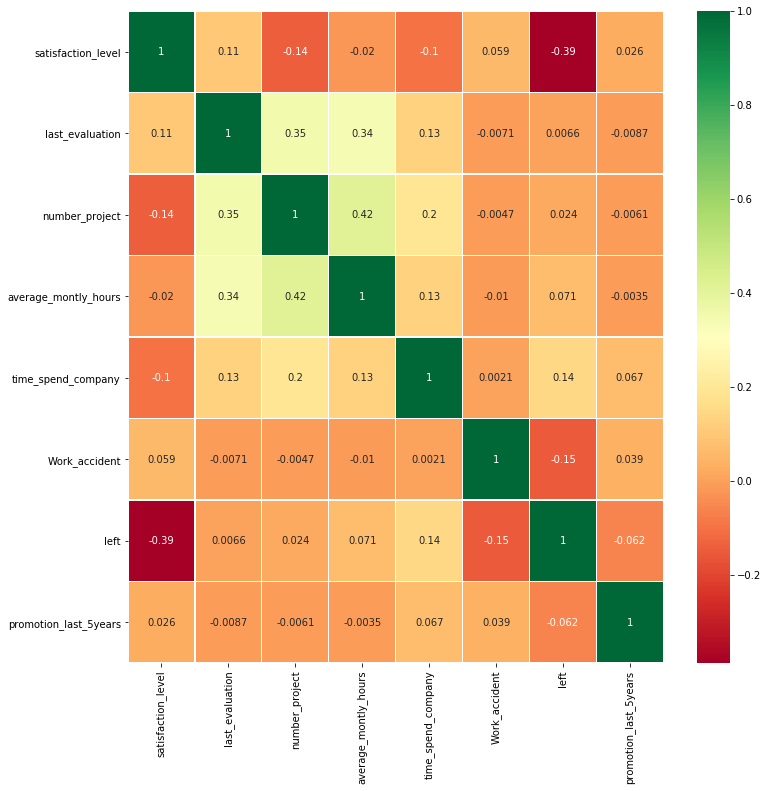

In [7]:
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, cmap='RdYlGn')
plt.show()

In [8]:
# Две самые скорелированные переменные: average_monthly_hours и number_projects
# Две наименее скорелированные переменные: work_accident и time_spend_company

### 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [9]:
sales_count = data[data['left'] == 0].groupby('sales').agg(count=('sales', 'count')).reset_index()

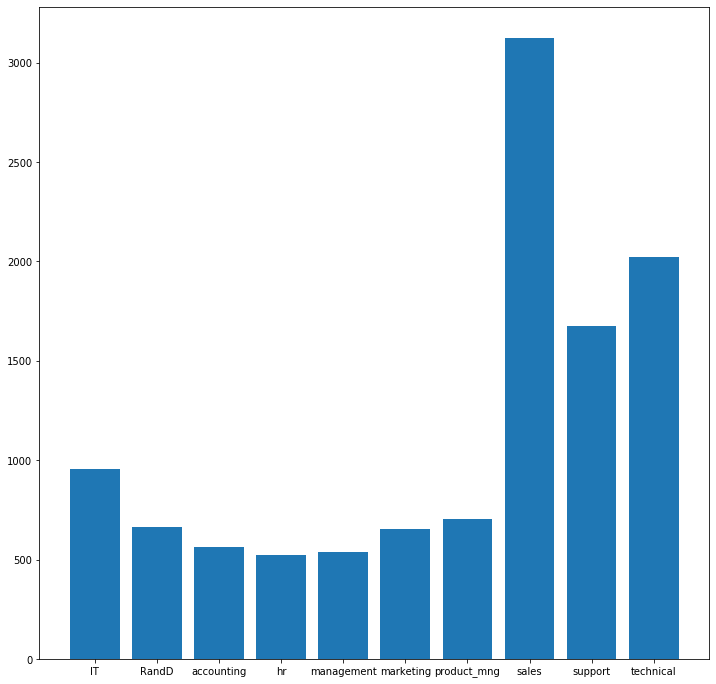

In [10]:
plt.subplots(figsize=(12, 12))

plt.bar(
    sales_count['sales'],
    sales_count['count']
)

plt.show()

In [11]:
print(sales_count)

         sales  count
0           IT    954
1        RandD    666
2   accounting    563
3           hr    524
4   management    539
5    marketing    655
6  product_mng    704
7        sales   3126
8      support   1674
9    technical   2023


### 5. Показать распределение сотрудников по зарплатам.

In [12]:
salary_count = data.groupby('salary').agg(count=('salary', 'count')).reset_index()
salary_count

,salary,count
0,high,1237
1,low,7316
2,medium,6446


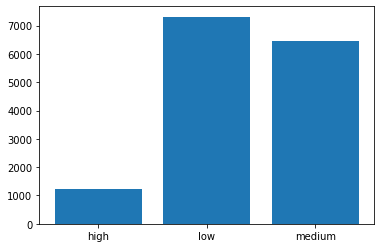

In [13]:
plt.bar(
    salary_count['salary'],
    salary_count['count']
)
plt.show()


### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [14]:
salary_department = (
    data.groupby(['salary', 'sales'])
    .agg(count=('salary', 'count'))
    .reset_index()
    .sort_values(by=['sales', 'salary'])
)

salary_department.head()

,salary,sales,count
0,high,IT,83
10,low,IT,609
20,medium,IT,535
1,high,RandD,51
11,low,RandD,364


### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [15]:
import scipy.stats as stats

In [16]:
# the higher the number of hours the higher the pay

higher_salary = data[data['salary'] == 'high']
lower_salary = data[data['salary'] == 'low']

In [17]:
stats.ttest_1samp(
    higher_salary['average_montly_hours'],
    lower_salary['average_montly_hours'].mean()
)

Ttest_1sampResult(statistic=-0.83239123369722, pvalue=0.40534894696749324)

In [18]:
# Pvalue превышает критически значимое значения, что означает мы не можем отвергнуть нулевую гипотезу
# Результаты не значимы на 5% уровне
# Вывод: наша гипотеза не верна, кол-во часов сотрудник проводит на работе не влияет на уровень его компенсации

### 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов

In [19]:
# Группируем данные по уволившимся и не уволившимся сотрудникам

In [20]:
data_left = data[data.left == 1]
data_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [21]:
promotion_share_left = (len(data_left[data_left['promotion_last_5years'] != 0]) / len(data_left)) *100
promotion_share_left 

0.5320638476617194

In [22]:
avg_satisfaction_left = data_left.agg({'satisfaction_level': 'sum'}) / len(data_left)
avg_satisfaction_left

satisfaction_level    0.440098
dtype: float64

In [23]:
avg_projects_left = data_left.agg({'number_project': 'sum'}) / len(data_left)
avg_projects_left

number_project    3.855503
dtype: float64

In [24]:
data_employed = data[data.left == 0]
data_employed.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [25]:
promotion_share_employed = (len(data_employed[data_employed['promotion_last_5years'] != 0]) / len(data_employed)) *100
promotion_share_employed

2.6251312565628284

In [26]:
avg_satisfaction_employed = data_employed.agg({'satisfaction_level': 'sum'}) / len(data_employed)
avg_satisfaction_employed

satisfaction_level    0.66681
dtype: float64

In [27]:
avg_projects_employed = data_employed.agg({'number_project': 'sum'}) / len(data_employed)
avg_projects_employed

number_project    3.786664
dtype: float64

### 9. Разделить данные на тестовую и обучающую выборки; построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary); оценить качество модели на тестовой выборки

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [29]:
lda = LinearDiscriminantAnalysis()

In [30]:
data = data.drop('sales', 1)

In [31]:
data = data.drop('salary', 1)

In [32]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [33]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2)

In [34]:
data_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
1252,0.42,0.50,2,155,3,0,1,0
2660,0.66,0.46,4,204,4,0,0,0
13817,0.56,0.39,3,106,8,0,0,0
14280,0.43,0.50,2,135,3,0,1,0
2104,0.17,0.73,5,258,4,0,0,0
...,...,...,...,...,...,...,...,...
13366,0.70,0.88,4,180,2,0,0,0
1378,0.80,0.87,5,240,6,0,1,0
4528,0.80,0.77,4,205,2,0,0,0
4855,0.92,0.62,4,196,3,0,0,0


In [35]:
data_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
4383,0.19,0.68,5,149,3,0,0,0
12338,0.39,0.50,2,142,3,0,1,0
9155,0.59,0.47,3,129,2,0,0,0
9324,0.57,0.66,4,158,2,0,0,0
8728,0.13,0.73,5,206,5,0,0,0
...,...,...,...,...,...,...,...,...
5750,0.75,0.71,4,209,3,0,0,0
5134,0.62,0.91,3,195,3,0,0,0
8865,0.58,0.53,4,181,3,1,0,0
9134,0.91,0.66,5,212,3,0,0,0


In [36]:
y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']

In [37]:
data_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
4383,0.19,0.68,5,149,3,0,0
12338,0.39,0.50,2,142,3,0,0
9155,0.59,0.47,3,129,2,0,0
9324,0.57,0.66,4,158,2,0,0
8728,0.13,0.73,5,206,5,0,0


In [38]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [39]:
lda.predict(data_test)

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T
result

,0,1
0,0,0
1,1,0
2,0,0
3,0,0
4,0,1
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,0,0


In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, lda.predict(data_test))

0.7626666666666667